In [13]:
using Pkg, Revise
Pkg.activate("../GenLinAlgProblems")
using GenLinAlgProblems, LinearAlgebra, RowEchelon, LaTeXStrings, Plots, SymPy, Latexify

  Activating project at `C:\Users\jeff\NOTEBOOKS\elementary-linear-algebra\GenLinAlgProblems`


<div style="float:center;width:100%;text-align:center;">
<strong style="height:100px;color:darkred;font-size:40px;">Orthogonal Vectors</strong><br>
</div>

# 1. Inner Product Spaces and Metrics

## 1.1 Basic Definitions

In the following, a bar over an expression signifies complex conjugation.

<div style="background-color:#F2F5A9;color:black;">

**Definition:** An **inner product space** is a vector space $V$ over the scalars $\mathbb{F}$
 with a function $\; <.,.> : V \times V \rightarrow \mathbb{F}$<br> $\quad\quad$ with the following properties
$\forall x,y,z \in V, \; \forall \alpha\in \mathbb{F}:$

$\qquad
\begin{align}
 &<x,y>          &=& \;\overline{ <y,x> } & \text{(conjugate symmetry)             } \\
 &<x, \alpha y>  &=& \;\alpha <x,y>       & \text{(linearity in the second argument)} \\
 &<x, y+z>     &=& <x, y> + <x, z>        & \\
\end{align}
$

and

$\qquad
<x,x>\quad = \left\{ \begin{align}& c > 0 & \quad x \ne 0\\ & 0 \quad & \text{ otherwise} \end{align} \right. \quad\quad \text{ (positive definite)}
$
</div>

These properties are modeled on the dot product:

$\qquad<u,v> = \overline{u} \cdot v$

$\quad$ is an inner product for $\mathbb{F} = \mathbb{Q}, \mathbb{F} = \mathbb{R}$ and $\mathbb{C} = \mathbb{R}.$<br>
$\quad$ The **complex conjugate is required for complex numbers,** since the dot product is not positive definite

**Note** that for $\mathbb{F} = \mathbb{Z}_2$ the dot product is not positive definite.

Inner products can be used to define a **distance** function, i.e.,
<div style="background-color:#F2F5A9;color:black;">

**Definition:** A **metric** for a set $M$ is a function $d : M \times M \rightarrow \mathbb{R}$<br>
$\quad\quad$ with the following properties
$\forall x,y,z \in V, \; \forall \alpha\in \mathbb{F}:$

$\qquad
\begin{align}
&d(x,y) = 0 \Leftrightarrow x= y \\
&d(x,y) = d(y,x) \\
&d(x,y) \le d(x,z) + d(z,y)\\
\end{align}
$

**Remark**: The axioms for a metric guarantee

$\qquad d(x,y) \ge 0$
</div>

<div style="background-color:#F2F5A9;color:black;">

**Definition:** The **norm** of a vector $v$ in an inner product space

$\qquad \lVert v \rVert = \sqrt{ <v,v> }$

**Definition:** The **distance** between two vectors $u$ and $v$ in an inner product space is

$\qquad d(x,y) = \lVert x-y \rVert $

</div>

**Remarks:**
* For the dot product in $\mathbb{R}^2$ and $\mathbb{R}^3$, this definition yields the **Euclidean length** of a vector. E.g.,<br>
$\qquad\lVert \begin{pmatrix}u_1\\u_2 \end{pmatrix} \rVert = \sqrt{ u_1^2 + u_2^2 }$
* The definition of the norm from the inner product shows that<br>
$\qquad
\lVert \alpha u \rVert = \sqrt{ < \alpha v, \alpha v > } = \ \lVert \alpha \rVert \ \lVert v \rVert
$

A **unit vector** is a vector with norm equal to 1. Such a vector may be constructed from any non-zero vector $u$ with

$\qquad
\hat{u} = \frac{1}{\lVert u \rVert} u
$

In [3]:
pr("Inner product and norms", sz=15)
printstyled("Example (Real Numbers)\n"; color=:red )
u = [3 0 4 0 ]
v = [1 2 0 2 ]
println( "The dot product of u = $u and v = $v is u⋅v = $(u ⋅ v)")
println( "The norm of u is              √(u⋅u) = $(sqrt(u ⋅ u))")
println( "The distance from u to v is   d(u,v) = $(sqrt( (u-v)⋅(u-v))) ")
println()
printstyled("Example (Complex Numbers)\n"; color=:red )
u = [3im 0 4 0 ]
v = [1 2 1im 4 ]
println( "The dot product of u = $u and v = $v is u⋅v = $(u ⋅ v)")
println( "The norm of u is              √(u⋅u) = $(sqrt(u ⋅ u))")
println( "The distance from u to v is   d(u,v) = $(sqrt( (u-v)⋅(u-v))) ")
println()
println( "Using the norm() function, the norm of u is $(norm(u))")
println( "Using the norm() function, the distance from of u to v is $(norm(u-v))")

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">Inner product and norms</p>\n</div>")

Example (Real Numbers)
The dot product of u = [3 0 4 0] and v = [1 2 0 2] is u⋅v = 3
The norm of u is              √(u⋅u) = 5.0
The distance from u to v is   d(u,v) = 5.291502622129181 

Example (Complex Numbers)
The dot product of u = Complex{Int64}[0 + 3im 0 + 0im 4 + 0im 0 + 0im] and v = Complex{Int64}[1 + 0im 2 + 0im 0 + 1im 4 + 0im] is u⋅v = 0 + 1im
The norm of u is              √(u⋅u) = 5.0 + 0.0im
The distance from u to v is   d(u,v) = 6.855654600401044 + 0.0im 

Using the norm() function, the norm of u is 5.0
Using the norm() function, the distance from of u to v is 6.855654600401044


In [9]:
pr("Unit Vectors", sz=15)
u=[ 2   6 9]; println( "A unit vector pointing i the same direction as u=$(u) is    1/11*$(11*u/norm(u))")
u=[ 2im 6 9]; println( "A unit vector pointing i the same direction as u=$(u) is    1/11*$(11*u/norm(u))")

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">Unit Vectors</p>\n</div>")

A unit vector pointing i the same direction as u=[2 6 9] is    1/11*[2.0 6.0 9.0]
A unit vector pointing i the same direction as u=Complex{Int64}[0 + 2im 6 + 0im 9 + 0im] is    1/11*ComplexF64[0.0 + 2.0im 6.0 + 0.0im 9.0 + 0.0im]


## 1.2 Inequalities, Angle, Orthogonal Vectors

<div style="background-color:#F2F5A9;color:black;">

**Theorem: (Cauchy-Schwartz Inequality)** The inner product between two vectors $u$ and $v$ satisfies

$\qquad\lvert <u,v> \rvert \le \lVert u \rVert \ \lVert v \rVert$
</div>

**Remark:** The equality is trivially satisfied if either $u = 0$ or $v = 0$. When neither of the vectors is zero, we can rewrite this as

$\qquad
-1 \le \frac{ <u,v> }{\lVert u \rVert \ \lVert v \rVert} \le 1
$

In $\mathbb{R}^2$ with $<u,v> = u \cdot v$, this quotient is the cosine of the angle between the vectors $u$ and $v$.<br>
$\quad$ we therefore generalize this to
<div style="background-color:#F2F5A9;color:black;">

$\qquad
cos ( \angle (u,v) ) = \frac{ <u,v> }{\lVert u \rVert \ \lVert v \rVert}, \quad \text{ where } u \ne 0, v \ne 0
$
</div>

<div style="background-color:#F2F5A9;color:black;">

**Remark:** orthogonal non-zero vectors have $cos\ 90^\circ = 0$, i.e.,

$\qquad u \cdot v = 0 \Leftrightarrow u \perp v $

**Remark:**
* To simplify the previous remark, we define<br>
    the **zero vector** to be **orthogonal to any other vector:**<br>
    $\qquad
    u ⋅ v = 0 \Leftrightarrow u \perp v \quad \text{ for any two vectors } u \text{ and } v
     \;\textbf{ including the zero vector}.
     $
</div>

In [10]:
u = [1 5 3]; v = [4 1 2]; w=[1 1 1]
println( "The angle between $u and $v is approximately $(round(acosd( (u ⋅v)/(norm(u)*norm(v))), digits=2)) degrees" )
println( "The distance from u=$u to v=$v is \t\t$(round(norm(u-v),digits=2))")
println( "A detour via w=$w increases the distance to \t$(round(norm(w-u)+norm(w-v),digits=2))")

The angle between [1 5 3] and [4 1 2] is approximately 56.41 degrees
The distance from u=[1 5 3] to v=[4 1 2] is 		5.1
A detour via w=[1 1 1] increases the distance to 	7.63


## 1.3 Fundamental Theorem of Linear Algebra (Part 2)

### 1.3.1 Main Definitions and Theorem

#### 1.3.1.1 Linear Independence of Orthogonal Vectors

<div style="float:left;background-color:#F2F5A9;color:black;">

**Theorem:** Orthogonal vectors are **linearly independent.**

**Corollary:** Given a matrix $A$ in $\mathbb{R}^{M \times N}$
* Any two vectors $r \in \mathscr{R}(A), n \in \mathscr{N}(A)$ are orthogonal, i.e., $r \perp n$
* Any two vectors $c \in \mathscr{C}(A), \tilde{n} \in \mathscr{N}(A^t)$ are orthogonal, i.e., $c \perp \tilde{n}$


---
**Remark:**
* The sketch of the Fundamental Theorem presented previously<br>
    depicts this situation accurately!<br><br>
    **Vectors in the two fundamental spaces in the domain and the codomain are orthogonal**.
</div>
<div style="float:left;margin-left:2cm;"><img src="Figs/FundamentalTheorem_0.svg" width=300></div>

#### 1.3.1.2 Orthogonal Spaces

<div style="background-color:#F2F5A9;color:black;">

**Definition:** A vector space $U$ is **orthogonal** to a vector space $V$ iff $\forall u \in U, \forall v \in V, \; u \perp v$

**Definition:** Let $U$ be a subspace of $V$. The **orthogonal complement** $U^\perp = \left\{ v \in V \mid \forall u \in U, \ v \perp u \right\}$.

**Theorem:** Given a vector space $U$, then $(U^\perp)^\perp = U$.<br>
**Theorem:** Given two vector spaces $U$ and $V$ such that $U^\perp = V$, then $V^\perp = U$.

</div>

<div style="background-color:#F2F5A9;color:black;">

**Corollary:** Given a matrix $A \in \mathbb{R}^{M \times N}$ then $\mathscr{R}(A)^\perp = \mathscr{N}(A)$ in $\mathbb{R}^N$.<br>
**Corollary:** Given a matrix $A \in \mathbb{R}^{M \times N}$ then $\mathscr{C}(A)^\perp = \mathscr{N}(A^t)$ in $\mathbb{R}^M$.

**Theorem:** Let $A$ be a matrix of size $M \times N.$ The **union of the bases** for $\mathscr{C}(A)$ and $\mathscr{N}(A^t)$ is a basis for $\mathbb{R}^M$.<br>
**Theorem:** Let $A$ be a matrix of size $M \times N.$ The **union of the bases** for $\mathscr{R}(A)$ and $\mathscr{N}(A)$   is a basis for $\mathbb{R}^N$.
</div>

In [16]:
pr("Fundamental Theorem (Part 2) Example", sz=15)
x,y,z=symbols("x,y,z")
r = [2;6;-1]
p = r[1]*x + r[2]*y +r[3]* z
println("Consider the system    $p = 0")

n1 = [6;-2;0]; n2=[1;0;2]
println("Its nullspace is a plane in R^3: span{ $n1, $n2 }")
println("Its row space is a line in R^3:  span( $r )")
println("Verify orhogonality: $r ⋅ $n1 = $(r ⋅ n1); $r ⋅ $n2 = $(r ⋅ n2)")
println()
println("Combining the bases for R(A) and N(A) yields a basis for R^3 = span( $r, $n1, $n2)")
println("Check the that matrix (r,n1,n2) is full column rank\n   (i.e., we indeed have a a basis for R^3:.\n   Its reduced row echelon form is:")
#Base.print_array( stdout, Int64.(round.(rref([r n1 n2]))));
latexify( Int.(round.(rref([r n1 n2]))))

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">Fundamental Theorem (Part 2) Example</p>\n</div>")

Consider the system    2*x + 6*y - z = 0
Its nullspace is a plane in R^3: span{ [6, -2, 0], [1, 0, 2] }
Its row space is a line in R^3:  span( [2, 6, -1] )
Verify orhogonality: [2, 6, -1] ⋅ [6, -2, 0] = 0; [2, 6, -1] ⋅ [1, 0, 2] = 0

Combining the bases for R(A) and N(A) yields a basis for R^3 = span( [2, 6, -1], [6, -2, 0], [1, 0, 2])
Check the that matrix (r,n1,n2) is full column rank
   (i.e., we indeed have a a basis for R^3:.
   Its reduced row echelon form is:


L"\begin{equation}
\left[
\begin{array}{ccc}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{array}
\right]
\end{equation}
"

### 1.3.2 Use the Fundamental Theorem to Decompose a Vector (Naive Method)

Let $A$ be a matrix of size $M \times N$ with rank $r$.<br>
Let $\left\{ c_1, c_2, \dots c_r \right\}$ be a basis for $\mathscr{C}(A)$, and $\left\{ ñ_1, ñ_2, \dots ñ_{M-r} \right\}$ be a basis for $\mathscr{N}(A')$.<br>

The combined basis $\left\{  c_1, c_2, \dots c_r, ñ_1, ñ_2, \dots ñ_{M-r} \right\}$ is a basis for $\mathbb{R}^M$.

> Any vector $b \in \mathbb{R}^M$ can therefore be written as a linear combination of these vectors:
$$
\begin{align}
&b           \; = \color{blue}{b_{\parallel}} + \color{red}{b_{\perp}},  & \text{ where} \\
&\color{blue}{b_{\parallel}  = \alpha_1 c_1 + \alpha_2 c_2 \dots + \alpha_r c_r} &\\
&\color{red}{b_\perp        = \beta_1 ñ_1 + \beta_2 ñ_2 \dots \beta_{M-r} ñ_{M-r}}.&
\end{align}
$$

<div style="background-color:#F2F5A9;color:black;float:left;">

The result is depicted in the following Figure:
* the red vector $b_\parallel$ is the part of $b$<br>
    that lies in the $\mathscr{C}(A)$ hyperplane (the linear combination formed with $\alpha_i c_i$)<br>
  it is the orthogonal projection $Proj_{\mathscr{C}(A)}^\perp b$ onto the column space $\mathscr{C}(A)$
* the blue vector $b_\perp$ is the part of $b$<br>
    that lies in the $\mathscr{N}(A')$ hyperplane (the linear combination formed with $\beta_j ñ_j$)
* these two vector components are orthogonal.
</div>
<div style="float:left;padding-left:0.5cm;margin-left:1cm;">
<img src="Figs/NormalEquations.svg"  width="390">
</div>

In [18]:
pr("Expressing a vector in the "*L"\mathscr{C}(A),\ \mathscr{N}(A^t)"*" basis", sz=15)
A     = [1 2 -1; 2 2 1 ]'
a1    = A[:,1]
a2    = A[:,2]

println("Consider the array A = ")
display(latexify(A))

printstyled("\nFind the bases:\n", color=:magenta)
ñ = [-4; 3; 2]
println(".  basis C(A)  = { a1=$a1, a2=$a2 }")
println(".  basis N(A') = { ñ =$ñ }")
println()
println(".  Check ñ is in the null space N(A'):  A' ñ = $(A'*ñ)")

printstyled("\nDecompose a vector:\n", color=:magenta)
println("\nAny vector b = α1 a1 + α2 a2 + β ñ\n.  To obtain this decomposition, we need to solve: [A ñ][α1;α1;β] = b\n")

b = [-3;7;-2]
println( "Let b = $b" )
coeffs = [a1 a2 ñ] \ b   # These happen to be integers
coeffs = Int64.(coeffs)  # Change to integers (will print in a nicer format)
println( ".  Solving, we obtain b = $(coeffs[1]) a1 + $(coeffs[2]) a2 + $(coeffs[3]) ñ")
b_parallel = coeffs[1]*a1 + coeffs[2]*a2
b_perp     = coeffs[3]*ñ
println( ".  b_parallel = $(coeffs[1]) a1 + $(coeffs[2]) a2 = $b_parallel")
println( ".  b_perp     = $(coeffs[3]) ñ          = $b_perp")
println()
println("Check orthogonality:           b_parallel ⋅ b_perp    = $(b_parallel ⋅ b_perp)")
println("Check these vectors sum to b:  b -b_parallel - b_perp = $(b -b_parallel - b_perp)" )

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">Expressing a vector in the \$\\mathscr{C}(A),\\ \\mathscr{N}(A^t)\$ basis</p>\n</div>")

Consider the array A = 


L"\begin{equation}
\left[
\begin{array}{cc}
1 & 2 \\
2 & 2 \\
-1 & 1 \\
\end{array}
\right]
\end{equation}
"


Find the bases:
.  basis C(A)  = { a1=[1, 2, -1], a2=[2, 2, 1] }
.  basis N(A') = { ñ =[-4, 3, 2] }

.  Check ñ is in the null space N(A'):  A' ñ = [0, 0]

Decompose a vector:

Any vector b = α1 a1 + α2 a2 + β ñ
.  To obtain this decomposition, we need to solve: [A ñ][α1;α1;β] = b

Let b = [-3, 7, -2]
.  Solving, we obtain b = 3 a1 + -1 a2 + 1 ñ
.  b_parallel = 3 a1 + -1 a2 = [1, 4, -4]
.  b_perp     = 1 ñ          = [-4, 3, 2]

Check orthogonality:           b_parallel ⋅ b_perp    = 0
Check these vectors sum to b:  b -b_parallel - b_perp = [0, 0, 0]


---
This computation was involved: we needed to find the bases of both $\mathscr{C}(A)$ and $\mathscr{N}(A^t)$ to perform this decomposition.

It turns out **we can do better!**

### 1.3.3 Use the Normal Equation to Decompose a Vector

The key observation in the naive method above was the decomposition of a vector $b$
> **Any vector** $\mathbf b \in \mathbb{R}^M$ can therefore be written as a linear combination of these vectors:<br>
$\qquad
\begin{align}
&b           \; = b_{\parallel} + b_{\perp},  & \text{ where} \\
&b_{\parallel}  = \alpha_1 c_1 + \alpha_2 c_2 \dots + \alpha_r c_r &\\
&b_\perp        = \beta_1 ñ_1 + \beta_2 ñ_2 \dots \beta_{M-r} ñ_{M-r},&
\end{align}
$<br>
> where the $c_i$ vectors form a basis for a hyperplane containing $b_\parallel$,<br>
> and the $ñ_j$ vectors form a basis for the orthogonal complement of this hyperplane.

The **basic idea** is to replace the system of equations for the coefficients $\alpha_i, \beta_j$<br>
$\quad$ by taking dot products with each of the $c_j$ in the column space $\mathscr{C}(A)$:

$\qquad
\begin{align}
(\xi) & \Leftrightarrow b = \alpha_1 c_1 + \alpha_2 c_2 \dots + \alpha_r c_r + b_\perp \\
      & \Rightarrow c_j b = \alpha_1 c_j \cdot c_1 + \alpha_2  c_j \cdot c_2 \dots + \alpha_r  c_j \cdot c_r + \color{red}{c_j \cdot b_\perp}, \quad\quad j=1,2, \dots r
\end{align}
$

$\quad$ Since $c_j \perp b_\perp$, the $c_j \cdot b_\perp = 0$: we are left with a set of equations that only involve the unknown coefficients $\alpha_i$!

**Remark**: We can rewrite the above **in matrix form:**
* let $\tilde{A} = \begin{pmatrix} c_1 & c_2 & \dots & c_r \end{pmatrix}, \quad x = \begin{pmatrix} \alpha_1 & \alpha_2 & \dots & \alpha_r \end{pmatrix}$.<br>
  Our equations are $(\xi) \Leftrightarrow \tilde{A} x = b \Rightarrow \tilde{A}^t \tilde{A} x = \tilde{A}^t b.$
* This would require us to identify a basis for the column space of $A$ to form the $\tilde{A}$ matrix. A little thought show this is not necessary!
  * If we express $b_\parallel$ as a linear combination of all of the columns of $A$, we no longer have a unique solution if the columns of $A$ are not linearly independent.<br>
  All we need is any one solution, however: we get $b_\parallel = A x$ for some vector $x$: thus $b = A x + b_\perp$.
  * Multiplying $b = A x + b_\perp$ by $A^t$ from the left still zeroes out the $b_\perp$ term: we are left with the equations<br>
   $\qquad{\color{red}{
   \begin{align}
   &A^t A x     &= A^t b &\quad \text{ known as the }\textbf{normal equation} \\
   &b_\parallel &= A x   &
   \end{align}}}\qquad\qquad (\text{Eq}_1)
   $.
* To solve for $b_\perp$, it is sufficient to realize that $b = b_\parallel + b_\perp$, so<br>
$\qquad\qquad
{\color{red}{b_\perp  = b - b_\parallel }} \qquad\qquad\qquad\qquad\qquad\qquad \text{Eq}_{2}
$

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">Repeat the previous example with the Normal Equation</p>\n</div>")

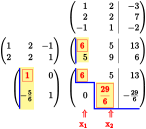

In [23]:
pr("Repeat the previous example with the Normal Equation", sz=15)
A     = [1 2; 2 2; -1 1 ]
b = [-3;7;-2]
pb = ShowGe{Rational{Int}}( A,  b, tmp_dir="../tmp")
ref!(pb,normal_eq=true)
show_layout!(pb)

In [24]:
printstyled("\nCompute any one solution of the normal equation  A_transpose A x = A_transpose b\n", color=:red)
x = A'A \ A'b
println( ".  x = $(Int64.( round.(x,digits=0)))")
b_parallel = A * x
printstyled("\nCompute b_parallel = A x", color=:red); println(" = $(Int64.(round.(b_parallel, digits=0)))")
b_perp = b - b_parallel
printstyled("\nCompute b_perp     = b - b_parallel", color=:red); println(" = $(Int64.(round.(b_perp, digits=0)))")
println("\nThis is the same solution we obtained before")


Compute any one solution of the normal equation  A_transpose A x = A_transpose b
.  x = [3, -1]

Compute b_parallel = A x = [1, 4, -4]

Compute b_perp     = b - b_parallel = [-4, 3, 2]

This is the same solution we obtained before


# 2. The Normal Equation

## 2.1 Basic Properties of the Normal Equation

<div style="background-color:#F2F5A9;color:black;">

The **normal equation**<br>
$\quad\qquad A^t A x = A^t b$

$\quad$ allows us to **decompose vectors** $b$ into two orthogonal components

$\quad\qquad b = b_\parallel + b_\perp$

$\quad$ such that $b_\parallel \in \mathscr{C}(A)$ and
$b_\perp \in \mathscr{N}(A^t)$:

$\quad\qquad
   \begin{align}
   &A^t A x     &=&\ A^t b  \\
   &b_\parallel &=&\ A x    \\
   &b_\perp     &=&\ b - b_\parallel
   \end{align}.
$
</div>

The **key observation** was that the multiplication of $A x = b = b_\parallel + b_\perp$ by $A^t$ zeros out the $b_\perp$ term,<br>
$\quad$ together with the fact that $\quad\mathscr{N}(A) = \mathscr{N}(A^t A)$<br>
$\quad$ which guarantees that the set of solutions of the normal equation is identical to the set of solution of $A x = b_\parallel$.

A second key observation is that the triangle inequality shows that the solutions to the normal equations also solve
the problem
<div style="background-color:#F2F5A9;color:black;">

$\quad\qquad
x^* = \arg\min_x { \lVert b - A x \rVert }
$
</div>
$\quad$ since $b_\parallel = b - A x^*$ is the shortest vector from a point in $\mathscr{C}(A)$ to $b$.<br>
$\quad$ Note that the solution need not be unique: as before, we are interested in

$\qquad
\begin{align}
   &b_\parallel &=&\ A x    \\
   &b_\perp     &=&\ b - b_\parallel,
\end{align}
$

$\quad$ so homogeneous solutions do not enter.

## 2.2 Examples

### 2.2.1 Split a Vector

In [25]:
A = [ 1  3 4
      5  3 8
      1 -1 0
      2  2 4
]
b = [15; 23; -2; 9]

pr("Find the shortest vector from b to "*L"\mathscr{C}(A), where", sz=15,height=8)
latexify( [latex("A ="), A', latex("\\quad b ="), b']')

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:8px;color:black;font-size:15pt;\">Find the shortest vector from b to \$\\mathscr{C}(A), where\$</p>\n</div>")

L"\begin{equation}
\left[
\begin{array}{cccc}
A = & \left[
\begin{array}{ccc}
1 & 3 & 4 \\
5 & 3 & 8 \\
1 & -1 & 0 \\
2 & 2 & 4 \\
\end{array}
\right] & \quad b = & \left[
\begin{array}{c}
15 \\
23 \\
-2 \\
9 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">Reduced row echelon form of the normal equation:</p>\n</div>")

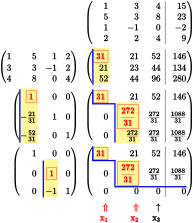

In [26]:
pr("Reduced row echelon form of the normal equation:", sz=15)
pb = ShowGe{Rational{Int}}( A,  b, tmp_dir="../tmp")
ref!(pb,normal_eq=true)
show_layout!(pb)

In [29]:
x_star = [0;2;2]
println("a particular solution is $x_star")
println("\n.  Check by substituting in the normal equation: $(A'A * x_star - A'b)")
println("\nSplit the vector b")
b_parallel = A*x_star
b_perp     = b - b_parallel
println(".  b_parallel = $b_parallel")
println(".  b_perp     = $b_perp")

println("\n\nAdditional check")
println(".  b_parallel and b_perp are indeed orthogonal:")
@show b_parallel ⋅ b_perp == 0;

a particular solution is [0, 2, 2]

.  Check by substituting in the normal equation: [0, 0, 0]

Split the vector b
.  b_parallel = [14, 22, -2, 12]
.  b_perp     = [1, 1, 0, -3]


Additional check
.  b_parallel and b_perp are indeed orthogonal:
b_parallel ⋅ b_perp == 0 = true


### 2.2.2 Distance of a vector from a hyperplane

In [31]:
pr( "The distance of point b from a span of vectors")

println("Given a set of vectors, write them into a matrix as columns A =")
A = [ 1  3 4
      5  3 8
      1 -1 0
      2  2 4
]
display(latexify(A))
println("\n\nThe span of the vectors is { w = A x}")
b = [15; 23; -2; 9]
println("\nThe distance of b=$b to the span of vectors is min || b - A x||,\ni.e., || b_perp ||")

println("\n\nSolving the normal equation for A x = b, we find")
x_star = [0;2;2]
println(".  a particular solution x_star = $x_star")
b_parallel = A*x_star
b_perp     = b - b_parallel
println(".  b_parallel                   = $b_parallel")
println(".  b_perp                       = $b_perp")

dist_b_colspace_A = norm(b_perp)
println("\nThe distance between b and C(A) = $(round(dist_b_colspace_A,digits=2))")
@show b_parallel ⋅ b_perp == 0;

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">The distance of point b from a span of vectors</p>\n</div>")

Given a set of vectors, write them into a matrix as columns A =


L"\begin{equation}
\left[
\begin{array}{ccc}
1 & 3 & 4 \\
5 & 3 & 8 \\
1 & -1 & 0 \\
2 & 2 & 4 \\
\end{array}
\right]
\end{equation}
"



The span of the vectors is { w = A x}

The distance of b=[15, 23, -2, 9] to the span of vectors is min || b - A x||,
i.e., || b_perp ||


Solving the normal equation for A x = b, we find
.  a particular solution x_star = [0, 2, 2]
.  b_parallel                   = [14, 22, -2, 12]
.  b_perp                       = [1, 1, 0, -3]

The distance between b and C(A) = 3.32
b_parallel ⋅ b_perp == 0 = true


In [33]:
pr(L"b_\perp"*" is shorter than any other "*L"b_{other} = b - A x", sz=12)
lengths = mapslices( norm, b .- 0.5A*randn(3, 50_000),dims= 1)
println( "The minimum of the random distances was $(minimum(lengths))")
println( "                            compared to $dist_b_colspace_A")

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:12pt;\">\$b_\\perp\$ is shorter than any other \$b_{other} = b - A x\$</p>\n</div>")

The minimum of the random distances was 6.112605398593277
                            compared to 3.3166247903554


### 2.2.3 Special Case: the columns of $A$ are mutually orthogonal

The equations simplify considerably when the columns $\{ a_1, a_2, \dots a_N \}$ of $A$ are **mutually orthogonal**, i.e, when

$\qquad
a_i \cdot a_j = \left\{ \begin{align} \lVert a_i \rVert^2 \quad  &\ \text{ when } i = j\\ 0 \quad &\ \text{ otherwise} \end{align} \right.
$

The normal equation takes the form

$\qquad
A^t A x = A^t b \Leftrightarrow D x = A^t b,
$

where  $D$ is a diagonal matrix

$\qquad
D = \begin{pmatrix} \lVert a_1 \rVert^2 & 0                   & \dots & 0 \\
                    0                   & \lVert a_1 \rVert^2 & \dots & 0 \\
                    \                   &     \               &  \    & 0 \\
                    0                   & 0                   & \dots & \lVert a_N \rVert^2 \end{pmatrix}
$

Assuming $a_i \ne 0, i =1,2, \dots N$, we obtain the following solution:
<div style="background-color:#F2F5A9;color:black;">

For mutually orthogonal vectors $a_i, i=1,\dots N$, the normal equations reduce to

$\qquad
\begin{align}
x_i          =& \frac{ b \cdot a_i }{ a_i \cdot a_i } \\
b_\parallel  =&\sum_{i=1}^{N}{ \frac{ b \cdot a_i }{ a_i \cdot a_i} a_i } \\
b_\perp      =& b - \sum_{i=1}^{N}{ \frac{ b \cdot a_i }{ a_i \cdot a_i} a_i } \\
\end{align}
$

**Remark**: the equations simplify even further when the $a_i$ are mutually orthonormal, i.e., when $a_i \cdot a_i = 1.$
</div>

# 3. Projection Matrices, Orthogonal Matrices and Unitary Matrices

## 3.1 Orthogonal Projection Matrices

### 3.1.1 Theory

Let's take another look at the normal equation for a matrix $A$  of size $M \times N$ for a matrix that has full column rank $rank(A) = N$.<br>
(We know that we only need one solution of the normal equation, so we could omit all dependent columns in any given matrix.)

The matrix $A^t A$ is square of size $N \times N$. Since $\mathscr{C}(A^t A) = \mathscr{C}(A)$, it has full column rank and is therefore invertible: we therefore have

$\qquad
   \begin{align}
   &A^t A x     &=&\ A^t b  &\Leftrightarrow x = (A^t A)^{-1} A^t b\\
   &b_\parallel &=&\ A (A^t A)^{-1} A^t b  = P b& \\
   &b_\perp     &=&\ b - b_\parallel = (I - P) b,&
   \end{align}
$

where we have set $P = A (A^t A)^{-1} A^t$.

We see that this matrix $P$ projects the vector $b$ orthogonally onto the column space $\mathscr{C}(A)$.

<div style="background-color:#F2F5A9;color:black;">

Let $\{ a_1, a_2, \dots a_N \}$
be a set of linearly independent vectors, and let
$A = \left( a_1\ a_2\ \dots \ a_N \right)$.

The orthogonal projection matrix onto the span of the vectors $a_i, i=1,2, \dots N$ is given by

$\qquad
P = A \left( A^t A \right) A^t
$

The orthogonal projection matrix onto the orthogonal complement of the span of the vectors
$a_i, i=1,2, \dots N$ is given by

$\qquad
P = I - A \left( A^t A \right) A^t
$
</div>

### 3.1.2 Examples

In [36]:
pr("Projection Matrix Onto a Line",sz=15)
v = [1; 1; 2]
P = v * inv(v'*v) * v'
# For a single vector, this reduces to
P = v * v' // (v'*v)

pr( "The projection matrix onto the line span{$v} is", sz=10 )
display(latexify( P ))

pr( "The projection matrix onto the plane orthogonal to span{$v} is", sz=10 )
display(latexify( I-P ))

@show P*v == v
@show (I-P)*v == zeros(Int,3);

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">Projection Matrix Onto a Line</p>\n</div>")

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:10pt;\">The projection matrix onto the line span{[1, 1, 2]} is</p>\n</div>")

L"\begin{equation}
\left[
\begin{array}{ccc}
\frac{1}{6} & \frac{1}{6} & \frac{1}{3} \\
\frac{1}{6} & \frac{1}{6} & \frac{1}{3} \\
\frac{1}{3} & \frac{1}{3} & \frac{2}{3} \\
\end{array}
\right]
\end{equation}
"

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:10pt;\">The projection matrix onto the plane orthogonal to span{[1, 1, 2]} is</p>\n</div>")

L"\begin{equation}
\left[
\begin{array}{ccc}
\frac{5}{6} & \frac{-1}{6} & \frac{-1}{3} \\
\frac{-1}{6} & \frac{5}{6} & \frac{-1}{3} \\
\frac{-1}{3} & \frac{-1}{3} & \frac{1}{3} \\
\end{array}
\right]
\end{equation}
"

P * v == v = true
(I - P) * v == zeros(Int, 3) = true


In [37]:
pr("Projection Matrix Onto a Plane",sz=15)
v1  = [1; 0; -1]
v2  = [1; 1;  0]
v   = [1;3;1]

A   = [v1 v2]

# find the inverse of A'A (over the rationals, to make it easy to see)
AtA    = A'A
invAtA = [ AtA[2,2] -AtA[1,2]; -AtA[2,1] AtA[1,1] ] // (AtA[1,1]*AtA[2,2]-AtA[1,2]*AtA[2,1])
#println("Check the inverse: inv(A'A)*(A'A) == I"); Base.print_matrix(stdout, invAtA*AtA);println()

P  = A * invAtA * A'

v_parallel = P*v
v_perp     = (I-P)*v

pr( "The projection matrix P_parallel onto the plane spanned by {v1, v2} is", sz=10 )
display(latexify( P ))
pr( "The projection matrix P_perp onto the line orthogonal to the plane spanned by {v1, v2} is", sz=10 )
latexify( I-P )
#println("Check P_parallel P_perp = 0: $(Int64.(P*(I-P)))")
#println("Check      P*P v)  = P v: $(P*P*v - P*v)")
#println("Check (I - P) P v = 0: $((I-P)*P*v)")

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">Projection Matrix Onto a Plane</p>\n</div>")

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:10pt;\">The projection matrix P_parallel onto the plane spanned by {v1, v2} is</p>\n</div>")

L"\begin{equation}
\left[
\begin{array}{ccc}
\frac{2}{3} & \frac{1}{3} & \frac{-1}{3} \\
\frac{1}{3} & \frac{2}{3} & \frac{1}{3} \\
\frac{-1}{3} & \frac{1}{3} & \frac{2}{3} \\
\end{array}
\right]
\end{equation}
"

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:10pt;\">The projection matrix P_perp onto the line orthogonal to the plane spanned by {v1, v2} is</p>\n</div>")

L"\begin{equation}
\left[
\begin{array}{ccc}
\frac{1}{3} & \frac{-1}{3} & \frac{1}{3} \\
\frac{-1}{3} & \frac{1}{3} & \frac{-1}{3} \\
\frac{1}{3} & \frac{-1}{3} & \frac{1}{3} \\
\end{array}
\right]
\end{equation}
"

**Remark:** since the equation for the projection onto a line is simpler,<br>
$\quad$ the problem above might also be approached by computing a single basis vector for $\mathscr{N}(A^t)$<br>
$\quad$ and using it to obtain the orthogonal projection matrix onto this line

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">Projection matrix onto \$\\mathscr{N}(A^t)\$, obtain a basis for the null space</p>\n</div>")

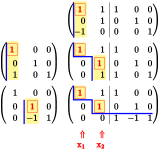

In [39]:
pr( "Projection matrix onto "*L"$\mathscr{N}(A^t)$,"*" obtain a basis for the null space",sz=15)
# GJ for [A I] to get the basis vector
pb = ShowGe{Rational{Int}}( A,  Matrix(1I(3)), tmp_dir="../tmp")
ref!(pb)
show_layout!(pb)

In [48]:
v3 = pb.matrices[end][end][3,3:end]
pr( "basis vector $(Int.(v3))" )

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">basis vector [1, -1, 1]</p>\n</div>")

In [50]:
# now we have the single vector case
P_N_At = v3 * v3' //  (v3'*v3)
P_C_A  = I - P_N_At
pr( "The projection matrix onto the plane spanned by {v1, v2} is", sz=10 )
display(latexify( P_C_A ))
pr( "The projection matrix onto the line orthogonal to the plane spanned by {v1, v2} is", sz=10 )
display(latexify( P_N_At ))

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:10pt;\">The projection matrix onto the plane spanned by {v1, v2} is</p>\n</div>")

L"\begin{equation}
\left[
\begin{array}{ccc}
\frac{2}{3} & \frac{1}{3} & \frac{-1}{3} \\
\frac{1}{3} & \frac{2}{3} & \frac{1}{3} \\
\frac{-1}{3} & \frac{1}{3} & \frac{2}{3} \\
\end{array}
\right]
\end{equation}
"

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:10pt;\">The projection matrix onto the line orthogonal to the plane spanned by {v1, v2} is</p>\n</div>")

L"\begin{equation}
\left[
\begin{array}{ccc}
\frac{1}{3} & \frac{-1}{3} & \frac{1}{3} \\
\frac{-1}{3} & \frac{1}{3} & \frac{-1}{3} \\
\frac{1}{3} & \frac{-1}{3} & \frac{1}{3} \\
\end{array}
\right]
\end{equation}
"

## 3.2 Orthogonal Matrices and Unitary Matrices

### 3.2.1 Definition and Example

<div style="background-color:#F2F5A9;color:black;">

**Definition:** An **orthogonal matrix** is a square matrices $Q$ with *orthonormal* columns: $Q^t Q = I$.<br>
$\qquad\quad\;\;$          A **unitary matrix** is a square matrix $Q$ such that $Q^H Q = I.$<br>
$\qquad\quad\;\;$  ($Q^H$ is the conjugate transpose of $Q$, aka the hermitian transpose.)
</div>

$\qquad\quad\;\;$ Since $Q$ is square and $Q^t Q = I$, we have $Q^{-1} = Q^t$

**Remark:** the matrix must be square. Otherwise $Q^t$ is a left inverse only!

In [118]:
pr("Example orthogonal Matrix")
A=[100 40 -37 16; -50 95 -16 38; 25 10 100 50; -10 -50 -40 95]
latexify( [latex("A ="), 1//115, A', latex( "A^t A ="), A'A//(115*115)]')

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n  <p style=\"height:15px;color:black;font-size:15pt;\">Example orthogonal Matrix</p>\n</div>")

L"\begin{equation}
\left[
\begin{array}{ccccc}
A = & \frac{1}{115} & \left[
\begin{array}{cccc}
100 & 40 & -37 & 16 \\
-50 & 95 & -16 & 38 \\
25 & 10 & 100 & 50 \\
-10 & -50 & -40 & 95 \\
\end{array}
\right] & A^t A = & \left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
\end{array}
\right] \\
\end{array}
\right]
\end{equation}
"

### 3.2.2 Important Examples

<div style="background-color:#F2F5A9;color:black;">

* A useful example of orthogonal matrices is the **Haar matrix**. See [wikipedia](https://en.wikipedia.org/wiki/Haar_wavelet)
* A useful example of a unitary matrix is the **Discrete Fourier Transform (DFT) matrix**. See [wikipedia](https://en.wikipedia.org/wiki/DFT_matrix)
    </div>

### 3.2.3 Important Properties of Orthogonal and Unitary Matrice

Applying orthogonal and unitary matrices to a vector does not change the length of a vector,
and does not change the angle between vectors:<br>
Computations involving orthogonal vectors will not overflow!

<div style="background-color:#F2F5A9;color:black;">

**Theorem:** Let $Q$ be an orthogonal (or a unitary) matrix, and let $x$ and $y$ be vectors of consistent length
* $\lVert Q x \rVert =  \lVert x \rVert, \quad\quad$ i.e., lengths are conserved
*  $< Q x, Q y > = <x,y>,\quad$ i.e., angles are conserved
*  $Q x \perp Q y \Leftrightarrow x \perp y, \quad$ i.e. orthgonal angles are conserved.
</div>